# Max-Cut Algorithm Performance Comparison

This notebook compares the performance of five different algorithms for solving the Max-Cut problem:
1. Randomized
2. Greedy
3. Semi-Greedy
4. Local Search
5. GRASP


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#styling
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Put the appropiate file name in this csv_file variable

In [4]:
csv_file = "Results/2105010.csv"

if not os.path.exists(csv_file):
    print(f"File {csv_file} not found!")
else:
    
    df = pd.read_csv(csv_file)

    display(df.head())

,Name,n,m,randomized,greedy,semi_greedy,local_search_value,local_search_iters,grasp_value,grasp_iters,known_best
0,g1,800,19176,9637,10954,11178,11400,1136,11432,2219,12078.0
1,g2,800,19176,9633,11046,11172,11353,910,11408,1762,12084.0
2,g3,800,19176,9649,11076,11230,11407,795,11372,1853,12077.0
3,g4,800,19176,9700,11098,11245,11414,950,11429,1579,NaN
4,g5,800,19176,9602,10992,11189,11373,1033,11370,1305,NaN


In [5]:
# for now i am plotting g1 to g5 only
g1_to_g5 = df[df['Name'].isin(['g1', 'g2', 'g3', 'g4', 'g5'])]

display(g1_to_g5)

,Name,n,m,randomized,greedy,semi_greedy,local_search_value,local_search_iters,grasp_value,grasp_iters,known_best
0,g1,800,19176,9637,10954,11178,11400,1136,11432,2219,12078.0
1,g2,800,19176,9633,11046,11172,11353,910,11408,1762,12084.0
2,g3,800,19176,9649,11076,11230,11407,795,11372,1853,12077.0
3,g4,800,19176,9700,11098,11245,11414,950,11429,1579,NaN
4,g5,800,19176,9602,10992,11189,11373,1033,11370,1305,NaN


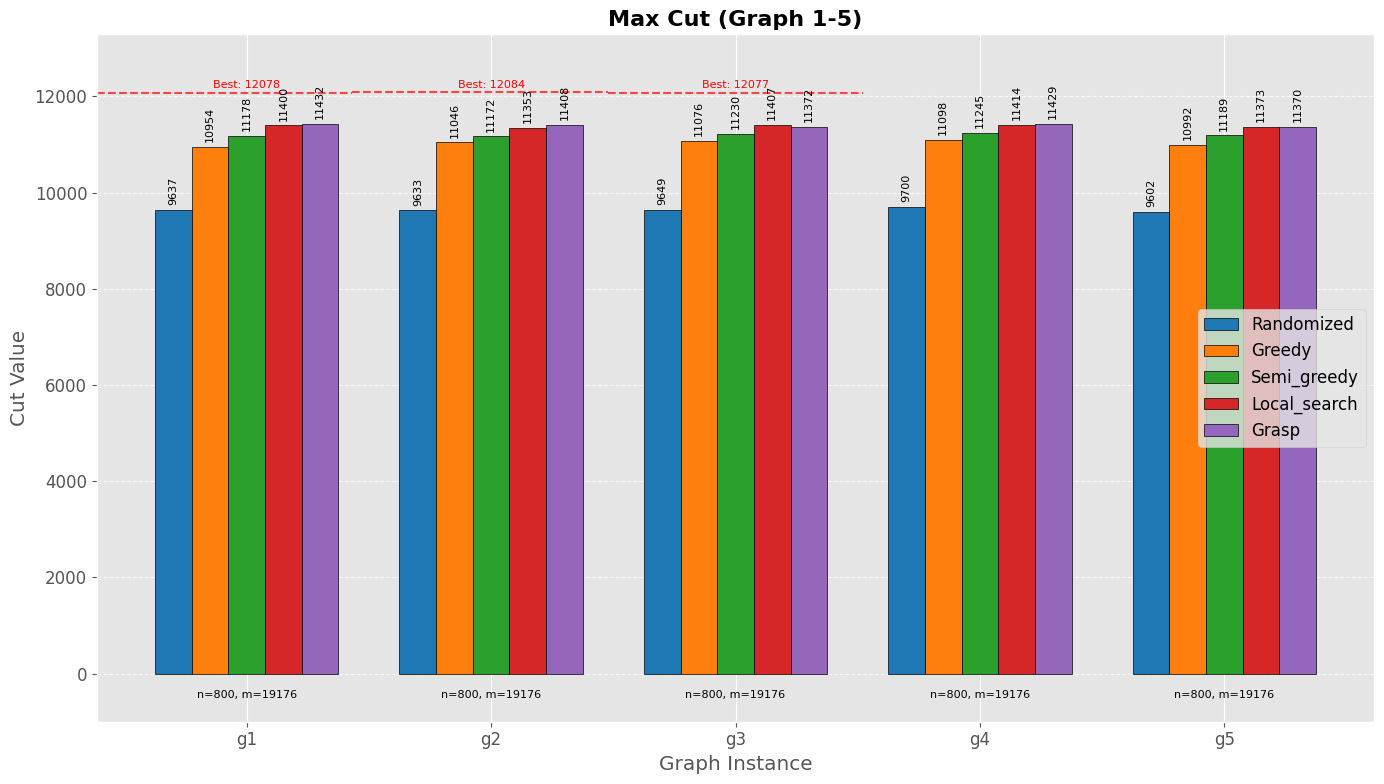

In [8]:
# algo color mapping
algorithms = {
    'randomized': '#1f77b4',
    'greedy': '#ff7f0e',
    'semi_greedy': '#2ca02c',
    'local_search_value': '#d62728',
    'grasp_value': '#9467bd'
}

fig, ax = plt.subplots(figsize=(14, 8))

num_algs = len(algorithms)
num_graphs = len(g1_to_g5)

bar_width = 0.15

r = np.arange(num_graphs)

for i, (alg, color) in enumerate(algorithms.items()):
    values = g1_to_g5[alg].values
    position = [x + bar_width * (i - num_algs/2 + 0.5) for x in r]
    bars = ax.bar(position, values, width=bar_width, color=color, edgecolor='black', label=alg.replace('_value', '').capitalize())
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 100, f'{int(height)}',
                ha='center', va='bottom', rotation=90, fontsize=8)
        
for i, row in g1_to_g5.iterrows():
    if pd.notna(row['known_best']) and row['known_best'] > 0:
        plt.axhline(y=row['known_best'], 
                   xmin=i/num_graphs, 
                   xmax=(i+1)/num_graphs, 
                   color='red', linestyle='--', alpha=0.7)
        plt.text(i, row['known_best'] + 100, f"Best: {int(row['known_best'])}", 
                fontsize=8, color='red', ha='center')

ax.set_xlabel('Graph Instance')
ax.set_ylabel('Cut Value')
ax.set_title('Max Cut (Graph 1-5)', fontsize=16, fontweight='bold')

plt.xticks([r for r in range(num_graphs)], g1_to_g5['Name'])


ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, row in g1_to_g5.iterrows():
    ax.text(i, -500, f"n={row['n']}, m={row['m']}", ha='center', fontsize=8)

plt.ylim(bottom=-1000, top=max(g1_to_g5['known_best'].max() * 1.1, g1_to_g5['grasp_value'].max() * 1.1))

plt.tight_layout()
plt.savefig('maxcut_comparison_g1_to_g5.png', dpi=300, bbox_inches='tight')
plt.show()